### Udacity Data Science Nanodegree - Proj 1 ###

This code in this notebook is intended to support the corresponding blog post: ["Asking Important Questions about Wine: An Investigation of Wine Enthusiast Ratings"](http://zdmc.info/blog/asking-important-questions-about-wine), and is hosted at GitHub: https://github.com/zdmc23/data-science/asking-important-questions-about-wine.ipynb and Kaggle: XX

#### Outline ####

 - [GATHER the data](#gather)
 - [ASSESS the data](#assess)
 - [CLEAN and TRANSFORM the data](#clean-xform)
 - [VISUALIZE and ANALYZE the data](#analyze)
 - [MODEL the data](#model)
 - [CONCLUSION](#conclusion)

#### Import dependencies ####

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

<a id="gather"></a>

### GATHER the data ###

 1. Kaggle dataset
 1. Supplementary Wikipedia dataset

#### Kaggle dataset ####

We have selected a Kaggle dataset for this project; the data can be found here: https://www.kaggle.com/zynicide/wine-reviews (requires Kaggle account to download). We have a single file in CSV format, so let's go ahead and load our data.

In [2]:
df = pd.read_csv("winemag-data-130k-v2.csv", index_col=0)
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


This dataset looks relatively manageable with only 10-15 columns. Let's take a quick look at the "shape" of the DataFrame to find out how many rows/entries and cols/variables/features that we have:

In [3]:
df.shape

(129971, 13)

130K rows, with 13 features.  Great!  Now let's gather the supplementary dataset

#### Supplementary Wikipedia dataset ####

Wikipedia is a wealth of information, and it does not dissapoint when it comes to information on grape varieties (which will be of important use to use when we [CLEAN and TRANSFORM the data](#clean-xform) below.

We will use [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/) to parse: https://en.wikipedia.org/wiki/List_of_grape_varieties and load it into a Numpy array for use later in this notebook:

In [4]:
# Use BeautifulSoup to parse: https://en.wikipedia.org/wiki/List_of_grape_varieties
from urllib.request import urlopen
from bs4 import BeautifulSoup
 
wikiUrl = "https://en.wikipedia.org/wiki/List_of_grape_varieties"
wikiPage = urlopen(wikiUrl)

soup = BeautifulSoup(wikiPage, "lxml")
color_tables = soup.find_all("table", attrs={"class": "wikitable"})

reds = []
whites = []
roses = []
unknowns = []

for color_table in color_tables:
    table_variety = color_table.find_previous_sibling("h4").find("span").text.lower()
    tds = color_table.find_all("td")
    for td in tds:
        links = td.find_all("a", href=lambda xx: xx and '/wiki/' in xx)
        for link in links:
            if "red grapes" == table_variety:
                reds.append(link.text.lower())
            elif "white grapes" == table_variety:
                whites.append(link.text.lower())
            elif "rose grapes" == table_variety:
                #roses.append(link.text.lower())
                pass
            else:
                unknowns.append(link.text.lower())

# unlinked
reds.append("Borba".lower())
reds.append("Buket".lower())
reds.append("Caberinta".lower())
reds.append("Caino Bravo".lower())
reds.append("Caricagiola".lower())
roses.append("Agdam Gyzyl Uzumu".lower())
roses.append("Chardonnay Rose".lower())
roses.append("Barbera Rose".lower())
roses.append("Chablais Blanc".lower())
roses.append("Chablais Rose".lower())
roses.append("Chablis Blanc".lower())
roses.append("Chablis Rose".lower())
roses.append("Pink Chablis".lower())
roses.append("Rielsing Rose".lower())

print("# REDS: ", len(reds))
print("# WHITES: ", len(whites))
print("# ROSES: ", len(roses))
print("# UNKNOWNS: ", len(unknowns))

# REDS:  757
# WHITES:  608
# ROSES:  9
# UNKNOWNS:  0


Now that we've successfully gathered our data, let's start assessing it!

<a id="assess"></a>

### ASSESS the data ###


We can invoke the "info" method to take a closer look at our DataFrame post-read of the CSV:

In [5]:
df.info()
#df.dtypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
country                  129908 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


We see the auto-assigned data types (inferred by Pandas when reading CSV input - mostly "object" in this case), as well as non-NaN counts, and even memory usage.

Let's check for any duplicates:

In [6]:
print("Total number of examples: ", df.shape[0])
print("Number of DUPLICATE examples: ", df[df.duplicated].shape[0])
#print("Number of examples with the same title and description: ", df[df.duplicated(['description','title'])].shape[0])

Total number of examples:  129971
Number of DUPLICATE examples:  9983


OK, unfortunately we've got nearly 10K duplicates and we'll want to remove these when we [CLEAN and TRANSFORM the data](#clean-xform) below.

Let's also check for null/NaN values by column:

In [7]:
df.isnull().sum()

country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

With respect to null/NaN values, there are some good findings and some bad findings.  It's good that "points" has 0 null values, and it's also good that we have no null values for "description" and "title", while only 1 for "variety".  These are important categories, so we're good there.  Unfortunately, "price" has far more null values than what we'd expect, and we'll need to make some decisions later on about how to best ***impute*** those missing values.

Now, we'll examine the number of unique values per column.

In [8]:
print(df.nunique())

country                      43
description              119955
designation               37979
points                       21
price                       390
province                    425
region_1                   1229
region_2                     17
taster_name                  19
taster_twitter_handle        15
title                    118840
variety                     707
winery                    16757
dtype: int64


In this dataset, we're particularly interested in "variety" so let's take a closer look.

In [9]:
df["variety"].values

array(['White Blend', 'Portuguese Red', 'Pinot Gris', ...,
       'Gewürztraminer', 'Pinot Gris', 'Gewürztraminer'], dtype=object)

There are too many "varieties" to list, so let's narrow it down and check out a few personal favorites (this will also ensure that I can answer my questions about the data related to personal preference).

In [10]:
favorites_list = ["bordeaux","cabernet","malbec","tempranillo"]
varieties_str = ' '.join(df["variety"].astype(str).str.lower().values)
any(variety in varieties_str for variety in favorites_list)

True

Great!  Some of my personal favorites are present, as expected (we can never be sure!). Now let's take a look at the "varieties" containing these keywords.

In [11]:
favorites_filter = df["variety"].astype(str).str.lower().str.contains("bordeaux|cabernet|malbec|tempranillo")
df[favorites_filter]["variety"].unique()

array(['Tempranillo-Merlot', 'Cabernet Sauvignon', 'Malbec',
       'Tempranillo Blend', 'Bordeaux-style White Blend',
       'Cabernet Franc', 'Bordeaux-style Red Blend',
       'Shiraz-Cabernet Sauvignon', 'Tannat-Cabernet',
       'Cabernet Sauvignon-Syrah', 'Tempranillo',
       'Cabernet Sauvignon-Carmenère', 'Merlot-Malbec',
       'Cabernet Sauvignon-Merlot', 'Syrah-Cabernet',
       'Cabernet Sauvignon-Sangiovese', 'Malbec-Merlot', 'Malbec-Tannat',
       'Malbec-Cabernet Franc', 'Cabernet Moravia',
       'Cabernet Sauvignon-Shiraz', 'Syrah-Cabernet Sauvignon',
       'Cabernet Franc-Cabernet Sauvignon', 'Cabernet Merlot',
       'Tempranillo-Cabernet Sauvignon', 'Merlot-Cabernet Franc',
       'Cabernet Blend', 'Cabernet Franc-Carmenère',
       'Cabernet Sauvignon-Malbec', 'Malbec-Cabernet Sauvignon',
       'Cabernet Franc-Merlot', 'Malbec-Syrah',
       'Cabernet Sauvignon-Tempranillo', 'Cabernet-Syrah',
       'Merlot-Cabernet Sauvignon', 'Sangiovese Cabernet',
       'To

We notice that some of the "variety" categories would be more useful if merged. e.g., "Tempranillo Blend", "Tempranillo-Garnacha", and "Garnacha-Tempranillo". We will revisit this shortly in the [CLEAN and TRANSFORM the data](#clean-xform) section below.

For a broader overview of the data, let's make use of Pandas "describe" method.  By default, "describe" only provides statistics for numeric data types in the supplied DataFrame.  For us, that is only "points" and "price".

In [12]:
df.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


We observe that the "point" scale ranges from 80 to 100 with an IQR (25-75%) range of 86-91, which is reasonable and somewhat expected.  However, "price" differs dramatically with our cheapest price at 4.00 and our most expensive at 3300.00 !!  Let's take one more look at our data before we begin to clean it up.  We will invoke "describe" once more, but this time we will supply the "include='all'" parameter and Transpose the resulting matrix for a more preferrable visualization.

In [13]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,129908,43,US,54504,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,129971,119955,"Cigar box, café au lait, and dried tobacco aro...",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
designation,92506,37979,Reserve,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN
points,129971,NaN,NaN,NaN,88.4471,3.03973,80,86,88,91,100
price,120975,NaN,NaN,NaN,35.3634,41.0222,4,17,25,42,3300
province,129908,425,California,36247,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_1,108724,1229,Napa Valley,4480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_2,50511,17,Central Coast,11065,NaN,NaN,NaN,NaN,NaN,NaN,NaN
taster_name,103727,19,Roger Voss,25514,NaN,NaN,NaN,NaN,NaN,NaN,NaN
taster_twitter_handle,98758,15,@vossroger,25514,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We observe some new information; e.g., top values for each column; top country is "US", top variety is "Pinot Noir", etc...  

Without jumping into the analysis phase, let's take a look at the 2 variables that we are most concerned about: "points" (the dependent variable for much of our analysis) and "price".  It's fairly common to plot a histogram for each:

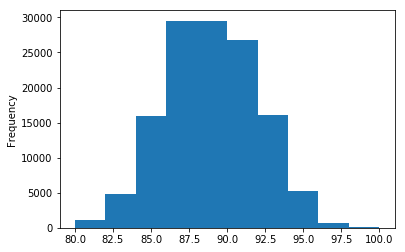

In [14]:
df['points'].plot.hist()

The "points" variable looks like a fairly normal distribution; that's good.  If we want, we can also take a look at the histogram using relative frequency:

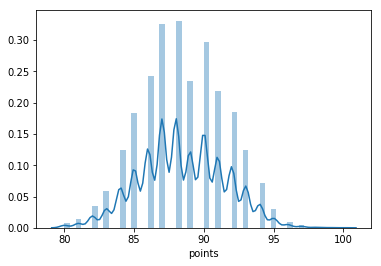

In [15]:
sns.distplot(df["points"])#, kde=False)

While we can typically eyeball the "skewness", it's helpful to also calculate the statistics; "kurtosis" as a measurement of the presence of outliers (see: https://en.wikipedia.org/wiki/Kurtosis). A normal distribution exhibits a skew of ~0 and a kurtosis of ~3.  Large values of kurtosis indicate outliers (and negative kurtosis indicates a flatter than normal distribution)

In [16]:
print("Skewness: %f" % df["points"].skew())
print("Kurtosis: %f" % df["points"].kurt())

Skewness: 0.045921
Kurtosis: -0.295963


Now let's check "price", and let's ignore the null/NaN values:

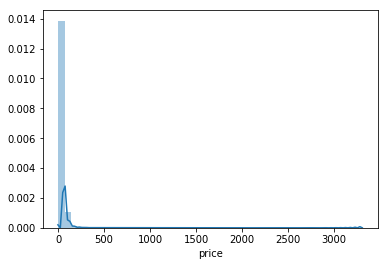

In [17]:
# we want to ignore the NaNs for our assessment; later we will decide how to impute
sns.distplot(df[np.isfinite(df["price"])]["price"])

In [18]:
print("Skewness: %f" % df["price"].skew())
print("Kurtosis: %f" % df["price"].kurt())

Skewness: 18.000957
Kurtosis: 829.520182


For "price", it's easy to see the postive skewness and the kurtosis statistic is very large (indicating that there are significant outliers).  We will revisit this shortly below when we remove outliers.

NOTE: In case of positive (right) skewness, log transformations may be applicable

Great! Now that we have a basic assessment of our data, and we have some ideas about of what sorts of changes should be made, let's proceed to "clean" and "transform" our data.

<a id="clean-xform"></a>

### CLEAN and TRANSFORM the data ###

 1. Drop duplicates
 1. Handle (impute, in our case) missing values
 1. Remove Outliers
 1. Standardize/Normalize values
 1. Merge "variety" values
 1. Create a new "color" feature

#### Drop duplicates ####

In [19]:
df=df.drop_duplicates()
df=df.reset_index(drop=True)
assert(df[df.duplicated].shape[0]==0)

#### Drop NaN/null "variety" values ####

In [20]:
df.dropna(subset=["variety"], inplace=True)
assert(df["variety"].isnull().sum()==0)

#### Handle (impute) missing "price" values ####

In [21]:
df["price"] = df["price"].transform(lambda xx: xx.fillna(xx.mean()))
assert(df["price"].isnull().sum()==0)

PS: For Time Series data, we could have chosen the "method" attribute in the "fillna" method to be "bfill" (backward fill) or "ffill" (forward fill) to populate the missing value with the preceding or following value respectively.  There also more complex fill techniques which could be implemented, like filling with the "mean" for that values respective "variety" or "price" (or any combination of values present in our dataset, or even external).

PSS: For this dataset, we'll elect to fill only missing values in the "price" column.  This is the only column having numeric values and nulls/NaNs, but if we wanted to fill the others with some "string" value, then we could certainly choose to do so.

Before removing our outliers, a quick pairplot helps us to visualize the relationship between our 2 numeric features: "points" and "price":

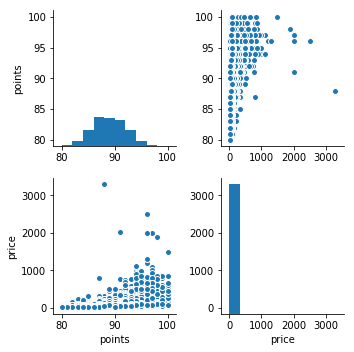

In [22]:
sns.pairplot(df[["points","price"]])

#### Remove Outliers ####

In [23]:
def remove_outliers_by_col(df, col, min_zero=True, inplace=False):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    # for more on IQR, see: https://en.wikipedia.org/wiki/Interquartile_range
    IQR = Q3 - Q1
    # calculate the maximum value and minimum values according to the Tukey rule
    max_value = Q3 + 1.5 * IQR
    min_value = Q1 - 1.5 * IQR
    if min_zero is True:
        # set a floor at zero
        min_value = max(min_value,0)
    # filter the data for price values that are greater than max_value or less than min_value (inclusive)
    filtered = (df[col] <= max_value) & (df[col] >= min_value)
    if inplace is True:
        df = df[filtered]
        return df
    else:
        tmp_df = df.copy()
        tmp_df = df[filtered]
        return tmp_df

In [24]:
prior_count = df.shape[0]
df = remove_outliers_by_col(df,"price")
curr_count = df.shape[0]
if curr_count < prior_count:
    print(prior_count - curr_count, "outliers removed")

8558 outliers removed


In [25]:
print("Skewness: %f" % df["price"].skew())
print("Kurtosis: %f" % df["price"].kurt())

Skewness: 0.793854
Kurtosis: -0.024412


What a dramatic difference it makes to remove the outliers per the [IQR](https://en.wikipedia.org/wiki/Interquartile_range) method!

#### Standardize values ####

Standardization refers to the process of subtracting the mean and dividing by the standard deviation. It will reset your distribution to be "normal" (having a mean of ~0 and a std. dev of ~1).

It is good practice to standardize values; it allows you to compare multiple variables according to the same scale, and more importantly it will most often yield better results when training shallow (e.g., Decision Tree) or deep (e.g., Neural Net) models.

In [26]:
df["points"].describe()

count    111429.000000
mean         88.164329
std           2.942906
min          80.000000
25%          86.000000
50%          88.000000
75%          90.000000
max          99.000000
Name: points, dtype: float64

In [27]:
def standardize_by_col(df, col, inplace=False):
    standardized = (df[col] - np.mean(df[col])) / np.std(df[col])
    if inplace is True:
        df[col] = standardized
        return df
    else:
        tmp_df = df.copy()
        tmp_df[str(col+"_standardized")] = standardized
        return tmp_df

In [28]:
df = standardize_by_col(df, "points")
df["points_standardized"].describe()

count    1.114290e+05
mean    -2.803550e-16
std      1.000004e+00
min     -2.774253e+00
25%     -7.354427e-01
50%     -5.583923e-02
75%      6.237642e-01
max      3.681980e+00
Name: points_standardized, dtype: float64

In [29]:
df = standardize_by_col(df, "price")
df[["points","points_standardized","price","price_standardized"]].head()

,points,points_standardized,price,price_standardized
0,87,-0.395641,35.620914,0.454690
1,87,-0.395641,15.000000,-0.942420
2,87,-0.395641,14.000000,-1.010172
3,87,-0.395641,13.000000,-1.077924
4,87,-0.395641,65.000000,2.445185


#### Create a new "type" feature ####

Feature engineering is the process of using domain knowledge of the data to create new features (for more on this see: https://en.wikipedia.org/wiki/Feature_engineering).  In our case, we'd like to add a common category for describing wine: "type".  When thinking about types of wines, most people immediately think about color: "Red" vs. "White", or "Rose".  However, our dataset also includes a significant amount of entries that can be classified in the "Sparkling" category.  Here is where we make use of the Wikipedia data that we have previously gathered:

In [30]:
# varities, used to map values in Kaggle dataset which do not match Wiki varieties per color OR are present in combination varieties
white_varieties = ["chardonnay","riesling","sauvignon blanc","sauvignon","prosecco","vermentino","turbiana","assyrtico","carricante","insolia","zibibbo","loureiro","tokaji","muskat ottonel","xarel-lo","antão vaz","siria","vidal","vignoles","pinot gris","pedro ximénez","arinto","fernão pires","müller-thurgau","loin de l'oeil","traminette"]
red_varieties = ["pinot noir","cabernet sauvignon","merlot","tempranillo",'barbera', 'port','grenache', 'tempranillo blend', 'garnacha',"pinot nero","pinotage","cabernet sauvignon-merlot","cabernet sauvignon-syrah","malbec-merlot","tinto fino","tinta fina","tinta de toro","carmenère","g-s-m","mencía","cabernet","alicante bouschet","prugnolo gentile","cinsault","lemberger","claret","petite verdot","nero di troia","plavac mali","negrette","norton","carignan"]
# keywords, used when parsing "description"
sparkling_keywords = ["sparkling","champagne","brut"]
rose_keywords = ["rose","rosé","rosato","rosado"]
white_keywords = ["blanc","blanco","blanca","white","champagne","sherry"]
red_keywords = ["red","tinto","tinta","cabernet","bordeaux","malbec","tempranillo","grenache","syrah","shiraz","dark","cherry","blackberry"]

In [31]:
def map_val(val):
    if isinstance(val, str):
        val = val.lower()
        if any(keyword in val for keyword in sparkling_keywords):
            return "Sparkling"
        if any(keyword in val for keyword in rose_keywords):
            return "Rose"
        if any(keyword in val for keyword in white_keywords):
            return "White"
        if any(keyword in val for keyword in red_keywords):
            return "Red"
        return "Unknown"
    return "Unknown"

In [32]:
def map_unknown_varieties(variety, title, description):
    if any(_variety in variety for _variety in white_varieties):
        return "White"
    if any(_variety in variety for _variety in red_varieties):
        return "Red"
    if any(keyword in variety for keyword in sparkling_keywords):
        return "Sparkling"
    if any(keyword in variety for keyword in rose_keywords):
        return "Rose"
    if any(keyword in variety for keyword in white_keywords):
        return "White"
    if any(keyword in variety for keyword in red_keywords):
        return "Red"
    title_mapping = map_val(title)
    if title_mapping is not "Unknown":
        return title_mapping
    description_mapping = map_val(description)
    if description_mapping is not "Unknown":
        return description_mapping
    return "Unknown"

In [33]:
def determine_color(variety, title, description):
    #is_red = False
    #is_white = False
    #is_rose = False
    #is_sparkling = False
    is_red = is_white = is_rose = is_sparkling = None
    variety = variety.lower()
    for rose in roses:                
        if rose in variety or variety in rose:
            is_rose = True
    for white in whites:
        if white in variety or variety in white:
            is_white = True
    for red in reds:               
        if red in variety or variety in red:
            is_red = True
    # variety should only match a single "color", but with the keywords there is sometimes overlap (so invoke "map_unknown_varieties")
    if is_red and not is_white and not is_rose and not is_sparkling:
        return "Red"
    elif not is_red and is_white and not is_rose and not is_sparkling:
        return "White"
    elif not is_red and not is_white and is_rose and not is_sparkling:
        return "Rose"
    elif not is_red and not is_white and not is_rose and is_sparkling:
        return "Sparkling"
    else:
        return map_unknown_varieties(variety, title, description)

In [34]:
df["type"] = df.apply(lambda row: determine_color(row.variety, row.title, row.description), axis=1)
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,points_standardized,price_standardized,type
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.620914,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,-0.395641,0.454690,White
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,-0.395641,-0.942420,Red
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.000000,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,-0.395641,-1.010172,White
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,-0.395641,-1.077924,White
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,-0.395641,2.445185,Red


In [35]:
print("# REDS: ", df[df["type"]=="Red"].shape[0])
print("# WHITE: ", df[df["type"]=="White"].shape[0])
print("# ROSE: ", df[df["type"]=="Rose"].shape[0])
print("# SPARKLING: ", df[df["type"]=="Sparkling"].shape[0])
print("# UNKNOWN: ", df[df["type"]=="Unknown"].shape[0])

# REDS:  60221
# WHITE:  44604
# ROSE:  3417
# SPARKLING:  2919
# UNKNOWN:  268


With the help of the Wikipedia data (~1300 unique categories), we were able classify nearly all our 130K entries (representing ~700 unique categories). This is a good result, and we will move forward with this data as we transition to the analysis phase.

Let's take a quick look at some examples that we were unable to properly classify:

In [36]:
df[df["type"]=="Unknown"].head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,points_standardized,price_standardized,type
697,Austria,Lively notes of fresh yellow plum and mandarin...,von Gösing,91,35.620914,Wagram,NaN,NaN,Anne Krebiehl MW,@AnneInVino,Soellner 2014 von Gösing Roter Veltliner (Wagram),Roter Veltliner,Soellner,0.963566,0.454690,Unknown
913,NaN,"Amber in color, this wine has aromas of peach ...",Asureti Valley,87,30.000000,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Gotsa Family Wines 2014 Asureti Valley Chinuri,Chinuri,Gotsa Family Wines,-0.395641,0.073861,Unknown
956,Italy,"Here's a fun, informal sparkler that has aroma...",Anni Venti Metodo Classico,87,30.000000,Southern Italy,Greco di Tufo,NaN,Kerin O’Keefe,@kerinokeefe,Cantine di Marzo NV Anni Venti Metodo Classico...,Greco,Cantine di Marzo,-0.395641,0.073861,Unknown
1337,Italy,"Elegant, savory and balanced, this opens with ...",NaN,90,25.000000,Southern Italy,Greco di Tufo,NaN,Kerin O’Keefe,@kerinokeefe,Di Meo 2016 Greco di Tufo,Greco,Di Meo,0.623764,-0.264899,Unknown
1895,Italy,Feudi di San Gregorio's distinctive take on th...,NaN,89,22.000000,Southern Italy,Greco di Tufo,NaN,NaN,NaN,Feudi di San Gregorio 2005 Greco di Tufo,Greco,Feudi di San Gregorio,0.283962,-0.468156,Unknown


To help understand the "Unknown" type varieties better, let's Group By variety and sort for most frequently occurring

In [37]:
unknowns = df[df["type"]=="Unknown"]["variety"].values
df_unknowns = pd.DataFrame(np.array(unknowns), columns=["variety"])
df_unknowns = df_unknowns.groupby(['variety']).size().reset_index(name='count')
df_unknowns = df_unknowns.sort_values(by="count", ascending=False, inplace=False, kind='quicksort', na_position='last')
print("# unknown: ", df_unknowns.shape[0])
print("# unknown repeated more than 5 times: ", df_unknowns[df_unknowns["count"] > 5].shape[0])

# unknown:  68
# unknown repeated more than 5 times:  4


In [38]:
df_unknowns.head()

,variety,count
39,Muscat,64
18,Greco,56
34,Meritage,22
26,Malvasia,18
46,Pallagrello,4


Of the 268 entries that we were unable to classify, we observe that only 4 varieties account for the bulk of failures.  If we investigate these varieties we learn that these particular varieties are grown with a range of color types.  i.e., Muscat "colors range from white, to yellow, to pink to near black" (https://en.wikipedia.org/wiki/Muscat_(grape)).

#### Create a new "style" feature ####

Another feature which might be helpful to engineer would be the "style".  For our purposes, we will consider only 3 categories: "Dry", "Sweet", and "Unknown".  For your own purposes, you might choose to include varying degrees of dryness/sweetness, or also include a category for "Table" wines, etc...

In [39]:
def determine_style(variety, title, description):
    dry = " dry "
    sweet = " sweet "
    if dry in variety.lower() or dry in title.lower() or dry in description.lower():
        return "Dry"
    elif sweet in variety.lower() or sweet in title.lower() or sweet in description.lower():
        return "Sweet"
    else:
        return "Unknown"

In [40]:
df_style = df.copy()
df_style["style"] = df.apply(lambda row: determine_style(row.variety, row.title, row.description), axis=1)
df_style.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,points_standardized,price_standardized,type,style
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.620914,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,-0.395641,0.454690,White,Unknown
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,-0.395641,-0.942420,Red,Unknown
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.000000,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,-0.395641,-1.010172,White,Unknown
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,-0.395641,-1.077924,White,Unknown
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,-0.395641,2.445185,Red,Unknown


In [41]:
print("# DRY: ", df_style[df_style["style"]=="Dry"].shape[0])
print("# SWEET: ", df_style[df_style["style"]=="Sweet"].shape[0])
print("# UNKNOWN: ", df_style[df_style["style"]=="Unknown"].shape[0])

# DRY:  8924
# SWEET:  7199
# UNKNOWN:  95306


Unlike our success with "type", "style" has a ~73% failure to classify rate. We will skip this potential feature for now, but if we wanted to spend more time, then we could take this up as a separate NLP effort.

#### Merge "variety" values ####

As we observed during our assessment, there are several varieties which may better be re-classified as part of a common group:

In [42]:
favorites_filter = df["variety"].astype(str).str.lower().str.contains("bordeaux|cabernet|malbec|tempranillo")
df[favorites_filter]["variety"].unique()

array(['Tempranillo-Merlot', 'Cabernet Sauvignon', 'Malbec',
       'Tempranillo Blend', 'Bordeaux-style White Blend',
       'Cabernet Franc', 'Bordeaux-style Red Blend',
       'Shiraz-Cabernet Sauvignon', 'Tannat-Cabernet',
       'Cabernet Sauvignon-Syrah', 'Tempranillo',
       'Cabernet Sauvignon-Carmenère', 'Merlot-Malbec',
       'Cabernet Sauvignon-Merlot', 'Syrah-Cabernet',
       'Cabernet Sauvignon-Sangiovese', 'Malbec-Merlot', 'Malbec-Tannat',
       'Malbec-Cabernet Franc', 'Cabernet Moravia',
       'Cabernet Sauvignon-Shiraz', 'Syrah-Cabernet Sauvignon',
       'Cabernet Franc-Cabernet Sauvignon', 'Cabernet Merlot',
       'Tempranillo-Cabernet Sauvignon', 'Merlot-Cabernet Franc',
       'Cabernet Blend', 'Cabernet Franc-Carmenère',
       'Cabernet Franc-Merlot', 'Cabernet Sauvignon-Malbec',
       'Malbec-Syrah', 'Malbec-Cabernet Sauvignon',
       'Cabernet Sauvignon-Tempranillo', 'Cabernet-Syrah',
       'Merlot-Cabernet Sauvignon', 'Sangiovese Cabernet',
       'To

In anticipation of our attempt to merge varieties, let's first Group By variety and sort for most frequently occurring:

In [43]:
df_varieties = df.groupby(['variety']).size().reset_index(name='count')
df_varieties = df_varieties.sort_values(by="count", ascending=False, inplace=False, kind='quicksort', na_position='last')
df_varieties.head()

,variety,count
439,Pinot Noir,11104
125,Chardonnay,10269
471,Red Blend,7620
80,Cabernet Sauvignon,7088
62,Bordeaux-style Red Blend,5803


We can perform simple merges by looking for a basic keyword (i.e., "pinot"), or if we know that some varieties go by other varietal names (i.e., "tinto fino" === "tempranillo"), then we can also go ahead and merge those (the more specific the better): 

In [44]:
def merge_variety(variety):
    variety = variety.lower()
    if "pinot" in variety:
        return "Pinot"
    elif "chardonnay" in variety:
        return "Chardonnay"
    elif "blend" in variety:
        return "Blend"
    elif "cabernet" in variety:
        return "Cabernet"
    elif "bordeaux" in variety:
        return "Bordeaux"
    elif any(_variety == variety for _variety in ["tinto fino", "tinta de toro", "tempranillo", "tempranillo blend"]):
        return "Tempranillo"
    elif "sangiovese" in variety:
        return "Sangiovese"
    else:
        return None

In [45]:
df_merged = df.copy()
df_merged["variety_merged"] = df.apply(lambda row: merge_variety(row.variety), axis=1)
df_merged.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,points_standardized,price_standardized,type,variety_merged
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.620914,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,-0.395641,0.454690,White,Blend
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,-0.395641,-0.942420,Red,None
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.000000,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,-0.395641,-1.010172,White,Pinot
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,-0.395641,-1.077924,White,None
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,-0.395641,2.445185,Red,Pinot


In [46]:
df_merged_grouped = df_merged.groupby(["variety_merged"]).size().reset_index(name='count')
df_merged_grouped = df_merged_grouped.sort_values(by="count", ascending=False, inplace=False, kind='quicksort', na_position='last')
df_merged_grouped.head()

,variety_merged,count
0,Blend,21897
3,Pinot,14287
2,Chardonnay,10402
1,Cabernet,8994
4,Sangiovese,2677


In [47]:
df_merged["variety_merged"].isnull().sum()

51407

Unfortunately, ~40% of our dataset is still not merged under an common variety.  Similar to the "style" feature, we could spend more time performing a more sophisticated transformation here, but for the sake of time (deadlines are real!) we will continue and discover whether we can make use of the 60% that we were able to successfully classify.

In [48]:
df["variety_merged"] = df_merged["variety_merged"]

Now that we've got our data cleaned and transformed, let's proceed to the analysis...

<a id="analyze"></a>

### VISUALIZE and ANALYZE the data ###

The goal of our analysis is to answer any questions that we may have originally asked of our dataset, and also to uncover new and unexpected insights when possible.  We would like to answer 4 questions (for more on this, see: http://zdmc.info/blog/asking-important-questions-about-wine):

  1. Do certain varieties consistently score higher than others?
  1. Is there an optimal price range, such that you can have confidence that the price corresponds to relative quality?  (Prior to examining this data, I've assumed a range of 15-35 USD).
  1. How does my favorite "winery" compare to others?
  1. Which features best determine the score of a wine?

#### Q1. Do certain varieties consistently score higher than others? ####

Let's attempt to answer our first question by looking at the mean score per variety, and selecting the top N.  We will also make use of our new "merged_varieties" feature to find out whether that broader categorical grouping makes any difference:

In [49]:
df_by_variety = df.groupby(["variety"]).size().reset_index(name="count")
df_by_variety.head()

,variety,count
0,Abouriou,2
1,Agiorgitiko,56
2,Aglianico,314
3,Aidani,1
4,Airen,3


NOTE: In somewhat arbitrary fashion, let's narrow down all varieties to popular varieties.  For our purposes, we'll consider any variety with more than 250 reviews (anything under 250 yielded a number of results that began to clutter the box chart visualization).  If we truly want to look at all varieties (in the hopes of finding some obscure and amazing variety, which posts a legitimately high score rather than simply presenting a biased sample), then we should also revisit the section above where we remove outliers per the IQR ratio.  However, we're going to assume that it's possible for varieties to score highly if they are rare (for a variety of reasons), and so we want to only consider varities with enough reviews to demonstrate consistency in the scores.

In [50]:
df_by_variety = df_by_variety[df_by_variety["count"]>250]
df_by_variety.shape

(50, 2)

In [51]:
tmp_df = df[df["variety"].isin(df_by_variety["variety"].values)]
tmp_df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,points_standardized,price_standardized,type,variety_merged
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.620914,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,-0.395641,0.454690,White,Blend
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,-0.395641,-0.942420,Red,None
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.000000,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,-0.395641,-1.010172,White,Pinot
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,-0.395641,-1.077924,White,None
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,-0.395641,2.445185,Red,Pinot


In [52]:
tmp_df_avg = tmp_df.groupby(['variety'])["points"].mean().reset_index(name='avg_points')
tmp_df_avg_sorted = tmp_df_avg.sort_values(by="avg_points", ascending=False, inplace=False, kind='quicksort', na_position='last')
tmp_df_avg_sorted.head()

,variety,avg_points
38,Sangiovese Grosso,90.060150
17,Grüner Veltliner,89.926933
22,Nebbiolo,89.896658
35,Riesling,89.287033
29,Port,89.150943


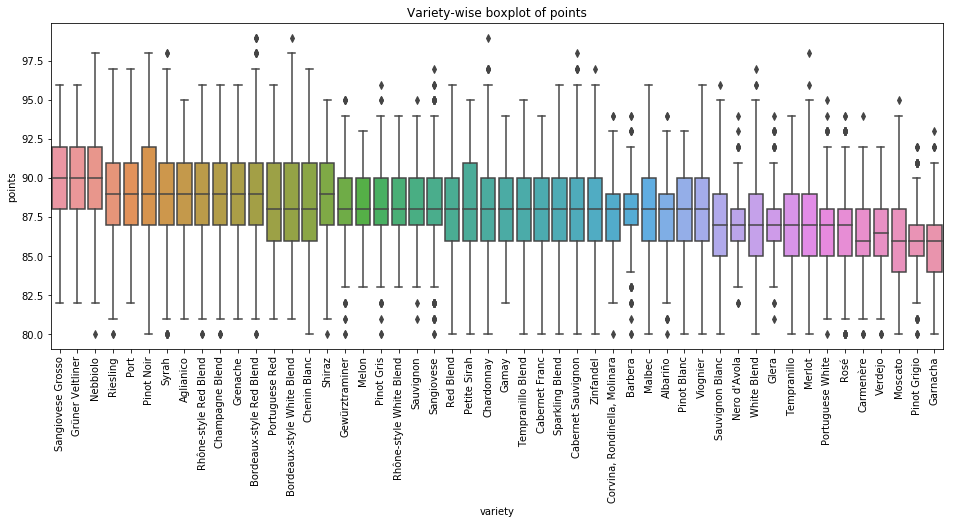

In [53]:
# how to interpret box plots: https://www.wellbeingatschool.org.nz/sites/default/files/W@S_boxplot-labels.png
plt.figure(figsize=(16,6))
sns.boxplot(x = tmp_df["variety"], y = tmp_df["points"], order=tmp_df_avg_sorted["variety"].values)
plt.title("Variety-wise boxplot of points")
plt.xticks(rotation=90);

#### A1:  Nebbiolo ####

In the Top 3, we find 2 Italian Reds ("Sangiovese Grosso" and "Nebbiolo") and an lesser known Austrian White ("Grüner Veltliner").  While "Sangiovese Grosso" and "Grüner Veltliner" score slightly higher in terms of average score, we give the nod to "Nebbiolo" because it offers higher upside, with the same limited downside.  Buy a bottle of the "Nebbiolo" variety, and you can be confident that you'll get a quality wine, and if you're lucky you may get a truly great bottle.

NOTE: Each of the Top 3 wines have at least 900 reviews, so it's not the result of a few extraordinarily positive reviews (or of a few specific reviewers - which matters a lot as we will learn later in this Notebook).

Let's further investigate how much money we may want spend if we want to personally test our answer and try a wine of the "Nebbiolo" variety:

In [54]:
df[df["variety"]=="Nebbiolo"]["price"].mean()

44.75227214968412

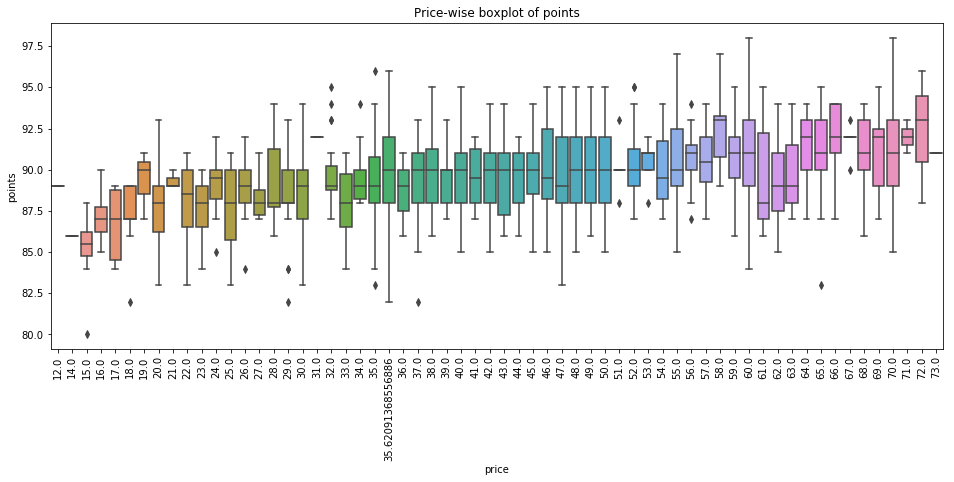

In [55]:
plt.figure(figsize=(16,6))
sns.boxplot(x = df[df["variety"]=="Nebbiolo"]["price"], y = df[df["variety"]=="Nebbiolo"]["points"])
plt.title("Price-wise boxplot of points")
plt.xticks(rotation=90);

It looks like we should be willing to spend over 50 USD if we want to be confident of having a quality bottle of wine, while also giving opportunity to get a truly great bottle.

We've answered our question per "variety", but let's continue to explore the data.  We can find out whether our simple attempt of merging varieties is helpful as it relates to mean scores, and whether wines score higher by "country", etc...:

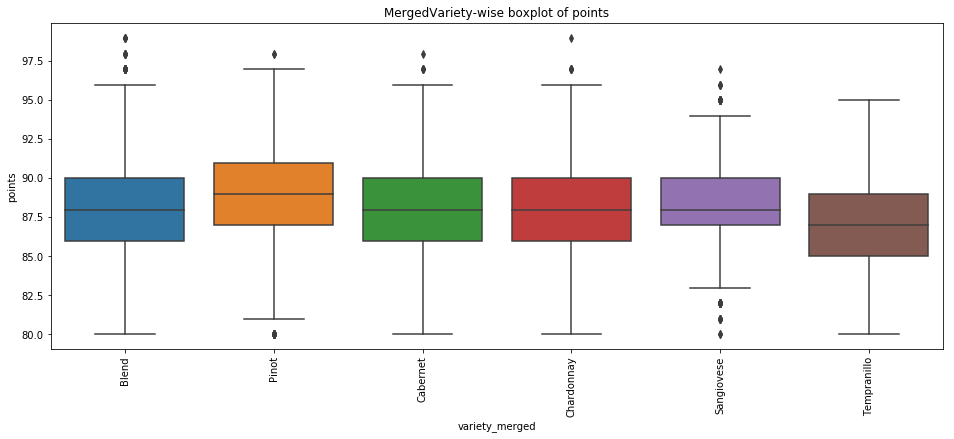

In [56]:
plt.figure(figsize=(16,6))
sns.boxplot(x = df["variety_merged"], y = df["points"])
plt.title("MergedVariety-wise boxplot of points")
plt.xticks(rotation=90);

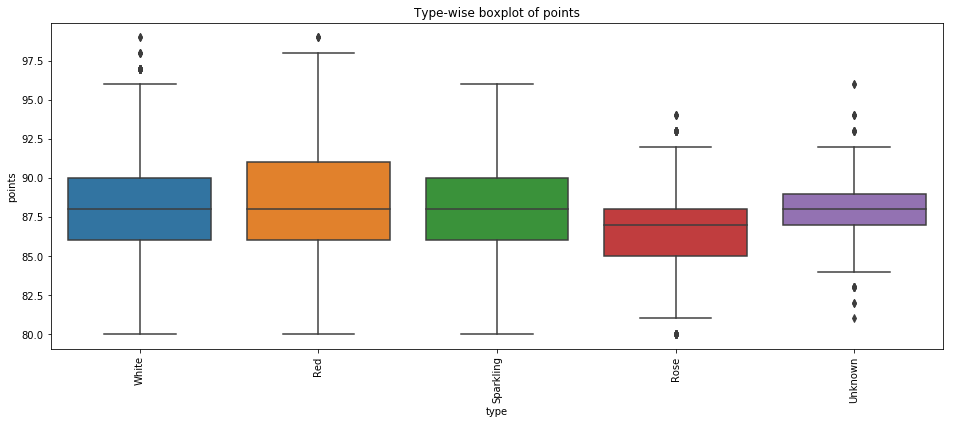

In [57]:
plt.figure(figsize=(16,6))
sns.boxplot(x = df["type"], y = df["points"])
plt.title("Type-wise boxplot of points")
plt.xticks(rotation=90);

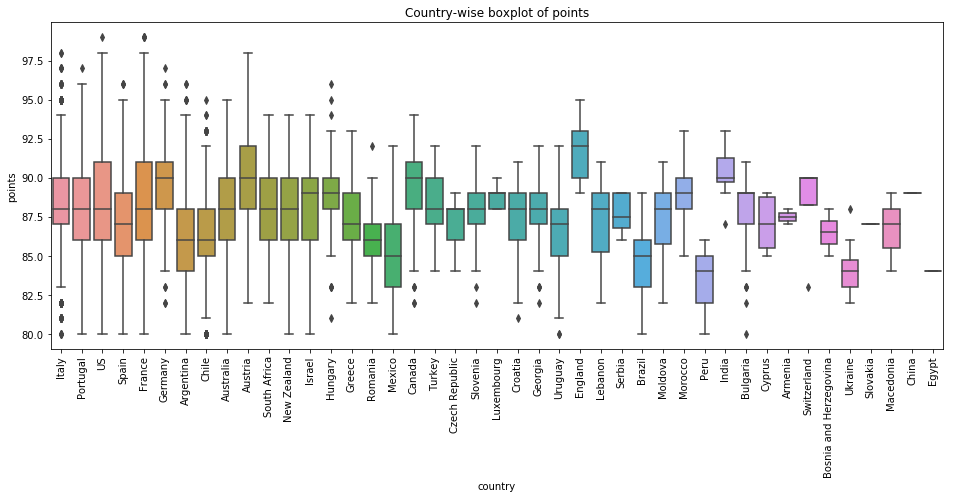

In [58]:
plt.figure(figsize=(16,6))
sns.boxplot(x = df["country"], y = df["points"])
plt.title("Country-wise boxplot of points")
plt.xticks(rotation=90);

Much to be expected here (good showings for France and the U.S.-thank you California!), however I am somewhat surprised by the poor Spanish results (my favorites wines are Spanish Riojas). I am very surprised by the poor Mexico results; I lived in Baja California for ~3 years, and Mexican wines are definitely under-appreciated. We've already observed that Whites do score on-par with Reds, so it *could* be that the Mexican Whites (which are admittedly poor) are impacting the overall country score.  Well, since we have the data, let's investigate that theory...

In [59]:
df_mex = df[df["country"]=="Mexico"]
df_mex.shape

(66, 17)

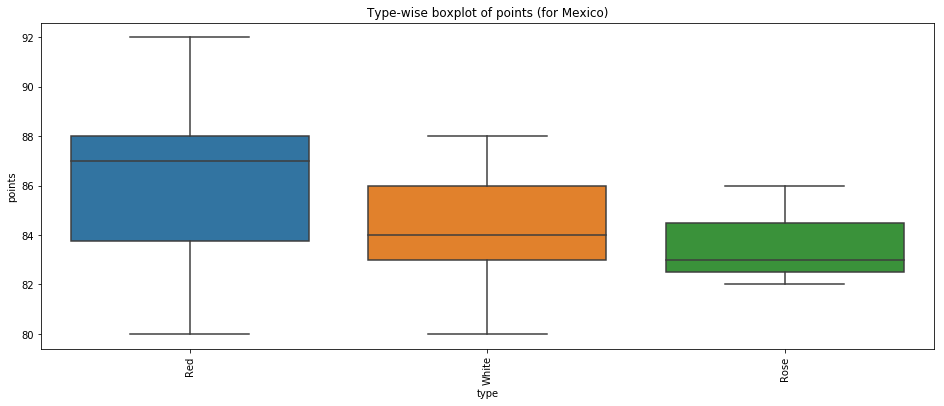

In [60]:
plt.figure(figsize=(16,6))
sns.boxplot(x = df_mex["type"], y = df_mex["points"])
plt.title("Type-wise boxplot of points (for Mexico)")
plt.xticks(rotation=90);

Admittedly, we have a relatively small sample size of 66 reviews, however, it does appear that our assumption was correct: Mexican Whites (and Roses) are dragging down the overall country rating.  Personally, I very much enjoy and recommend Mexican Reds, especially of the Tempranillo or Cabernet varieties, and especially from La "Valle de Guadalupe".

#### Q2. Is there an optimal price range, such that you can have confidence that the price corresponds to relative quality?  #### 

Prior to examining this data, I've assumed a range of 15-35 USD.  Let's investigate whether a range exists, and what that optimal price range is...

We can begin by simply plotting points over price:

In [61]:
def plot_scatter(df, col_x, col_y):
    N = df.shape[0]
    colors = np.random.rand(N)
    #area = (30 * np.random.rand(N))**2  # 0 to 15 point radii
    plt.scatter(df[col_x], df[col_y], c=colors, alpha=0.5)
    plt.xlabel(col_x)
    plt.ylabel(col_y)
    plt.show()

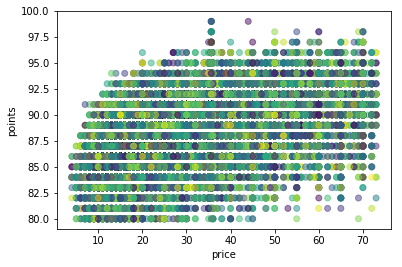

In [62]:
plot_scatter(df, "price", "points")

Unfortunately this chart doesn't tell us much; it would have been helpful had we not removed the outliers, but after doing so we're much better off plotting a linear regression:

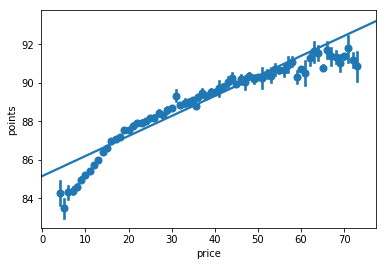

In [63]:
sns.regplot(x="price", y="points", x_estimator=np.mean, data=df)

Based on this regression plot, we see that "prices" between 20 and 60 USD correlate to their respective "point" expectations.  My previous assumption was a range between 15 and 35 USD, and it looks like it's safe to open up my wallet a bit more and expect to get a higher quality wine the more that I spend up until about the 60 USD pricepoint.

Let's plot my initial assumption:

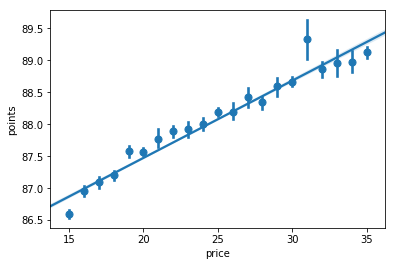

In [64]:
sns.regplot(x="price", y="points", x_estimator=np.mean, data=df[(df["price"] <= 35) & (df["price"] >= 15)])

It looks like even a 15 USD bottle of wine can be a risky purchase!  Now let's look more closely at the optimal range:

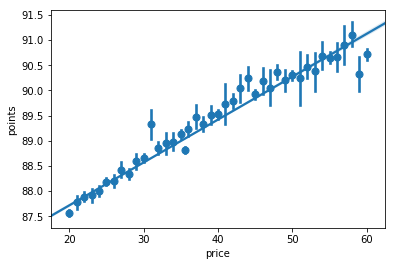

In [65]:
sns.regplot(x="price", y="points", x_estimator=np.mean, data=df[(df["price"] <= 60) & (df["price"] >= 20)])

After a closer look, it appears that we should restrict the range to between 30 and 50 USD, with the best chance for "upside" coming around the 45 USD pricepoint.

#### A2: An optimal price range seems to be 30-50 USD, with the most "upside" coming from a 45 USD bottle.  ####

However, even if you don't want to spend that much, you can still be confident that you'll get a decent bottle when spending more than 20 (and less than 60).

#### Q3. How does my favorite "winery" (CVNE: Compañía Vinícola del Norte de España) compare to others? ####

In [66]:
df.shape

(111429, 17)

In [67]:
winery_filter = df["winery"].astype(str).str.lower().str.contains("cvne")
df_cvne = df[winery_filter]
df_cvne.shape

(41, 17)

In [68]:
df_sans_cvne = pd.concat([df, df_cvne, df_cvne]).drop_duplicates(keep=False)
df_sans_cvne.shape

(111388, 17)

In [69]:
df_cvne["points"].mean()

88.7560975609756

In [70]:
df_sans_cvne["points"].mean()

88.16411103530004

CVNE outperforms the average "winery", but let's only compare CVNE Reds against the average Red...

In [71]:
df_cvne_reds = df_cvne[df_cvne["type"]=="Red"]
df_cvne_reds.shape

(31, 17)

In [72]:
df_sans_cvne_reds = df_sans_cvne[df_sans_cvne["type"]=="Red"]
df_sans_cvne_reds.shape

(60190, 17)

In [73]:
df_cvne_reds["points"].mean()

89.64516129032258

In [74]:
df_sans_cvne_reds["points"].mean()

88.38087722212993

In [75]:
df_cvne["is_cvne"] = True
df_sans_cvne["is_cvne"] = False
df_concat = pd.concat([df_cvne, df_sans_cvne])

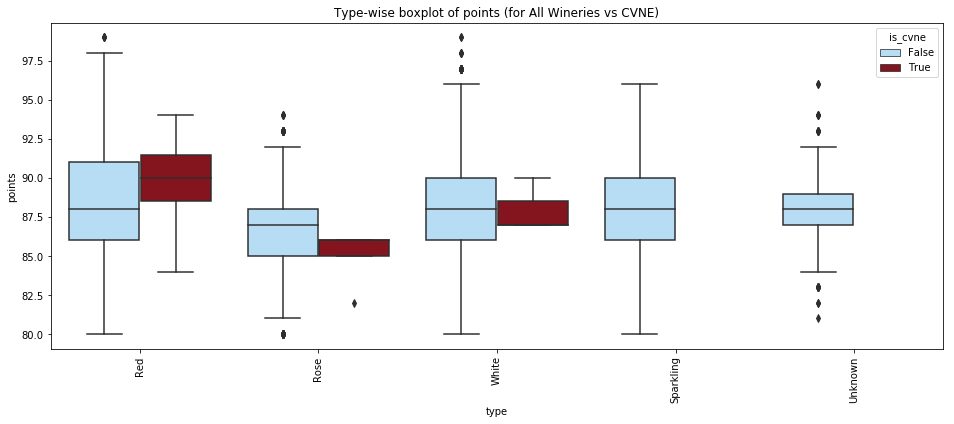

In [76]:
plt.figure(figsize=(16,6))
colors = ["#acdffe","#97020e"]
sns.boxplot(x=df_concat["type"], y = df_concat["points"], hue=df_concat["is_cvne"], palette=sns.color_palette(colors))
plt.title("Type-wise boxplot of points (for All Wineries vs CVNE)")
plt.xticks(rotation=90);

#### A3: CVNE does outperform other wineries (88.75 vs 88.16),  and even more significantly when comparing Reds only (89.64 vs 88.38) ####

So what are the highest rated wineries?

In [77]:
df_by_winery = df.groupby(["winery"]).size().reset_index(name="count")
# again, let's require a certain amount of entries: 100
df_by_winery = df_by_winery[df_by_winery["count"]>100]
df_by_winery.shape

(15, 2)

In [78]:
tmp_df = df[df["winery"].isin(df_by_winery["winery"].values)]
tmp_df_avg = tmp_df.groupby(["winery"])["points"].mean().reset_index(name="avg_points")
tmp_df_avg_sorted = tmp_df_avg.sort_values(by="avg_points", ascending=False, inplace=False, kind='quicksort', na_position='last')

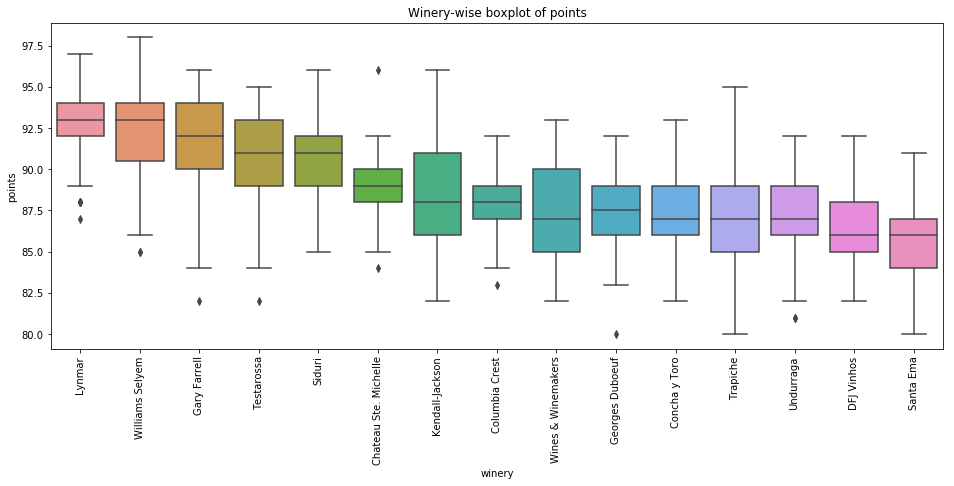

In [79]:
plt.figure(figsize=(16,6))
sns.boxplot(x = tmp_df["winery"], y = tmp_df["points"], order=tmp_df_avg_sorted["winery"].values)
plt.title("Winery-wise boxplot of points")
plt.xticks(rotation=90);

#### Other interesting visualizations ####

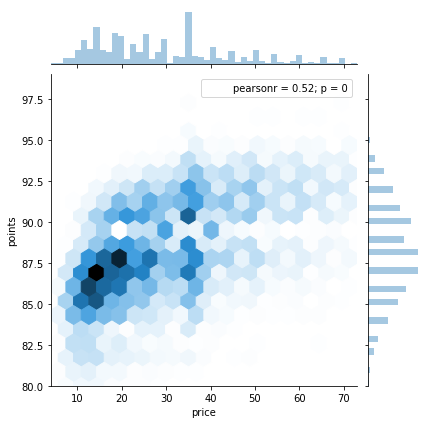

In [80]:
sns.jointplot(x='price', y='points', data=df, kind='hex', gridsize=20)

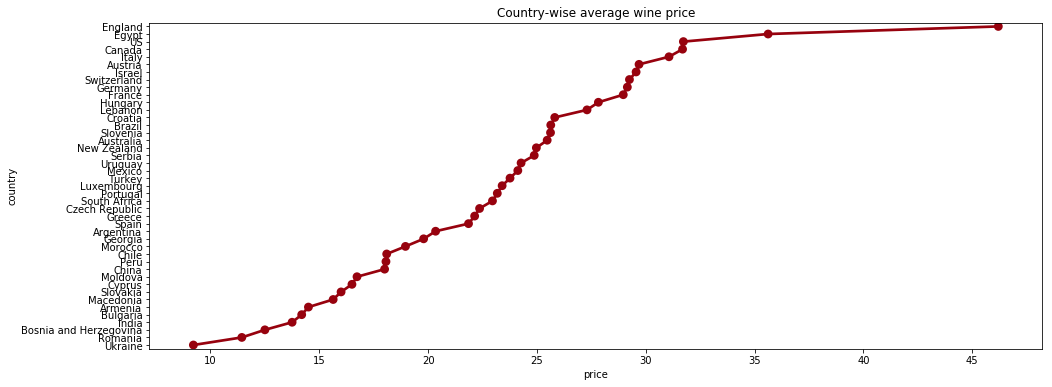

In [81]:
df_country = df.groupby(["country"]).mean()["price"].sort_values(ascending=False).to_frame()
plt.figure(figsize=(16,6))
sns.pointplot(x = df_country["price"] , y = df_country.index ,color="#97020e",orient='h',markers='o')
plt.title('Country-wise average wine price')
plt.xlabel("price")
plt.ylabel("country");

In [82]:
df_country.head()

,price
country,
England,46.197805
Egypt,35.620914
US,31.728170
Canada,31.690152
Italy,31.066917


After removing outliers, England has significantly more expensive wines; on average, 30% more than the next most expensive country (Egypt) !!

FacetGrid plots make for useful comparison visualizations:

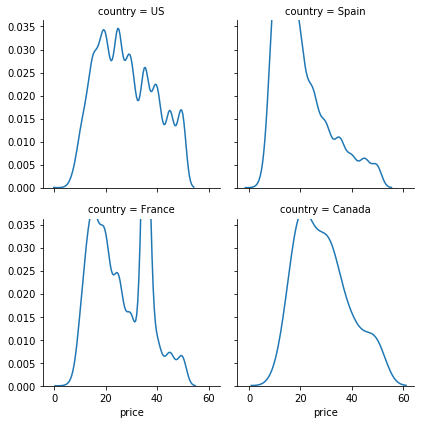

In [83]:
df_price = df[df["price"] <= 50]
tmp_df = df_price[df_price['country'].isin(['US','France', 'Canada', 'Spain'])]
g = sns.FacetGrid(tmp_df, col = "country", col_wrap = 2)
g.map(sns.kdeplot, "price")

Go ahead! Try to find a 30 USD bottle of wine in France

<a id="model"></a>

### MODEL the data ###

#### Q4. Which features best determine the score of a wine? ####

In order to answer our final question, we want to apply some shallow machine learning to train a Decision Tree (DT) regression model to produce feature scores (using the CatBoost algorithm):

#### CATBOOST ####

In [84]:
!pip install catboost

In [85]:
df["variety_merged"].replace(np.NaN, 'Unknown', inplace=True)

In [86]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor, Pool

X=df.drop(["points","points_standardized","price_standardized"], axis=1)
X=X.fillna(-1)
categorical_features_indices = categorical_features_indices = np.where(X.dtypes != np.float)[0]
y=df['points']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=52)

In [87]:
def perform_model(X_train, y_train,X_valid, y_valid,X_test, y_test):
    model = CatBoostRegressor(
        random_seed = 400,
        loss_function = 'RMSE',
        iterations=400,
    )
    
    model.fit(
        X_train, y_train,
        cat_features = categorical_features_indices,
        eval_set=(X_valid, y_valid),
        verbose=False,
        #plot=True
    )
    
    print("RMSE on training data: "+ model.score(X_train, y_train).astype(str))
    print("RMSE on test data: "+ model.score(X_test, y_test).astype(str))
    
    return model

In [88]:
model = perform_model(X_train, y_train, X_valid, y_valid, X_test, y_test)

RMSE on training data: 1.8925670558168568
RMSE on test data: 2.0800437113650396


In [89]:
feature_score = pd.DataFrame(list(zip(X.dtypes.index, model.get_feature_importance(Pool(X, label=y, cat_features=categorical_features_indices)))),
                columns=['Feature','Score'])

feature_score = feature_score.sort_values(by='Score', ascending=False, inplace=False, kind='quicksort', na_position='last')

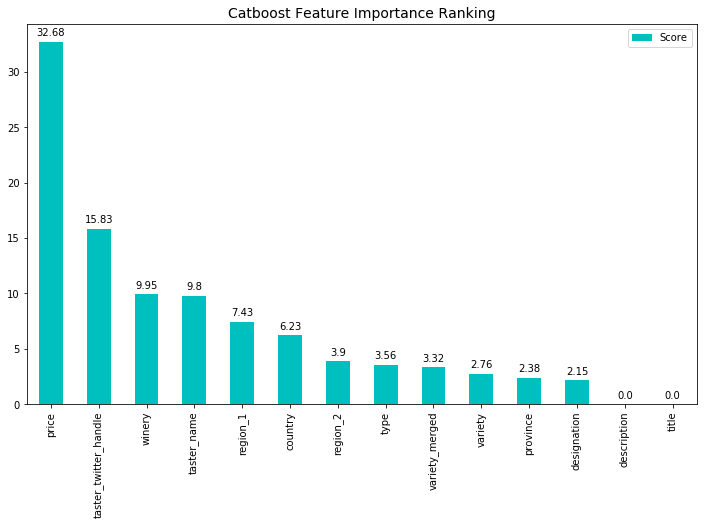

In [90]:
plt.rcParams["figure.figsize"] = (12,7)
ax = feature_score.plot('Feature', 'Score', kind='bar', color='c')
ax.set_title("Catboost Feature Importance Ranking", fontsize = 14)
ax.set_xlabel('')

rects = ax.patches

labels = feature_score['Score'].round(2)

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.35, label, ha='center', va='bottom')

plt.show()

#### A4. Price, but surprisingly followed by Taster identifier ("taster_twitter_handle") ####

It's not unexpected to see that "price" is the most important feature with respect to "points" value.  However, it is very unexpected to find that the second most important feature is the Taster identifier ("taster_twitter_handle"); this indicates that Taster bias plays a significant role in "points" score.

Let's take a closer look at these Tasters...

In [91]:
df["taster_twitter_handle"].nunique()

15

In [92]:
df.groupby(["taster_twitter_handle"]).size().reset_index(name="count")

,taster_twitter_handle,count
0,@AnneInVino,3179
1,@JoeCz,4335
2,@bkfiona,22
3,@gordone_cellars,3683
4,@kerinokeefe,8584
5,@laurbuzz,1649
6,@mattkettmann,5503
7,@paulgwine,8496
8,@suskostrzewa,1006
9,@vboone,7457


In [93]:
df.groupby(["taster_twitter_handle"]).mean()

,points,price,points_standardized,price_standardized
taster_twitter_handle,,,,
@AnneInVino,90.505190,29.717116,0.795429,0.054695
@JoeCz,88.169319,26.036160,0.001696,-0.194697
@bkfiona,86.818182,27.681818,-0.457423,-0.083200
@gordone_cellars,88.510996,25.343498,0.117798,-0.241627
@kerinokeefe,88.579800,32.275650,0.141178,0.228041
@laurbuzz,87.570042,22.641157,-0.201940,-0.424716
@mattkettmann,89.977103,36.267676,0.615984,0.498509
@paulgwine,88.933027,31.191223,0.261205,0.154569
@suskostrzewa,86.522863,21.468639,-0.557773,-0.504156


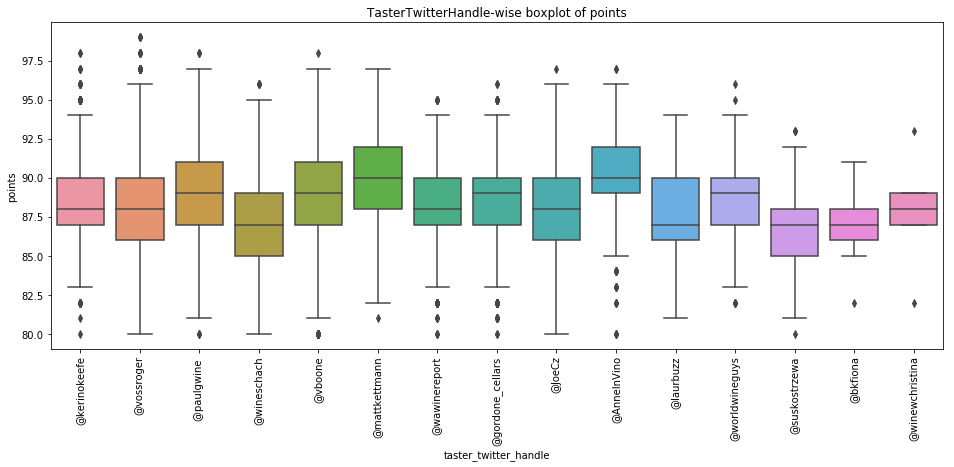

In [94]:
plt.figure(figsize=(16,6))
sns.boxplot(x = df["taster_twitter_handle"], y = df["points"])
plt.title("TasterTwitterHandle-wise boxplot of points")
plt.xticks(rotation=90);

<a id="conclusion"></a>

<a id="visualize"></a>

### Conclusion ###

We began by asking 4 questions of our [Wine Review](https://www.kaggle.com/zynicide/wine-reviews) dataset:

  1. Do certain varieties consistently score higher than others?
  1. Is there an optimal price range, such that you can have confidence that the price corresponds to relative quality?  (Prior to examining this data, I've assumed a range of 15-35 USD).
  1. How does my favorite "winery" compare to others?
  1. Which features best determine the score of a wine?
  
After applying some standard techniques to clean and transform our data, we then applied some statistical analysis to answer these questions.  

Per Q1., we discovered that certain varieties do consistently score higher than others, and we highlighted "Nebbiolo" in particular (remember to spend 50 USD or more for your best chance at a truly great bottle).  

Per Q2., we continued observed that the optimal price-range to purchase wine based on potential "points" is between 30-50 USD, with the most "upside" coming from a 45 USD bottle.  Can't afford the 50+USD "Nebbiolo" from Q1.?  If you can manage at least 30 USD, then you're still "safe" =)

Per Q3., I was delighted to learn that my favorite winery: CVNE (Compañía Vinícola del Norte de España) ***does*** outperform other wineries,  and even more significantly when comparing Reds only.  (Lynmar)[https://lynmarestate.com/] is the winery that scores the highest; they are known for their Pinot Noirs and Chardonnays.

Per Q4., we confirmed the obvious assumption that "price" has the most significant impact on "points", but it was the feature having the second most impact which was most surprising: "taster_twitter_handle".  [@AnneInVino](https://twitter.com/anneinvino) didn't always award the highest scores, but she rarely awards the lowest, and that sort of Taster bias makes "taster_twitter_handle" the second most important feature in our dataset.  Simply removing this feature doesn't help because the Taster's bias is already embedded in the "points"; rather we could assign a bias value to each review based on reviewer and then update with a "lesser_biased_points" feature, but that is work for another day...

I hope that this analysis will help you find a higher quality (er, at least a higher scored!) bottle of wine on your next purchase!